# Financial Risk Analytics


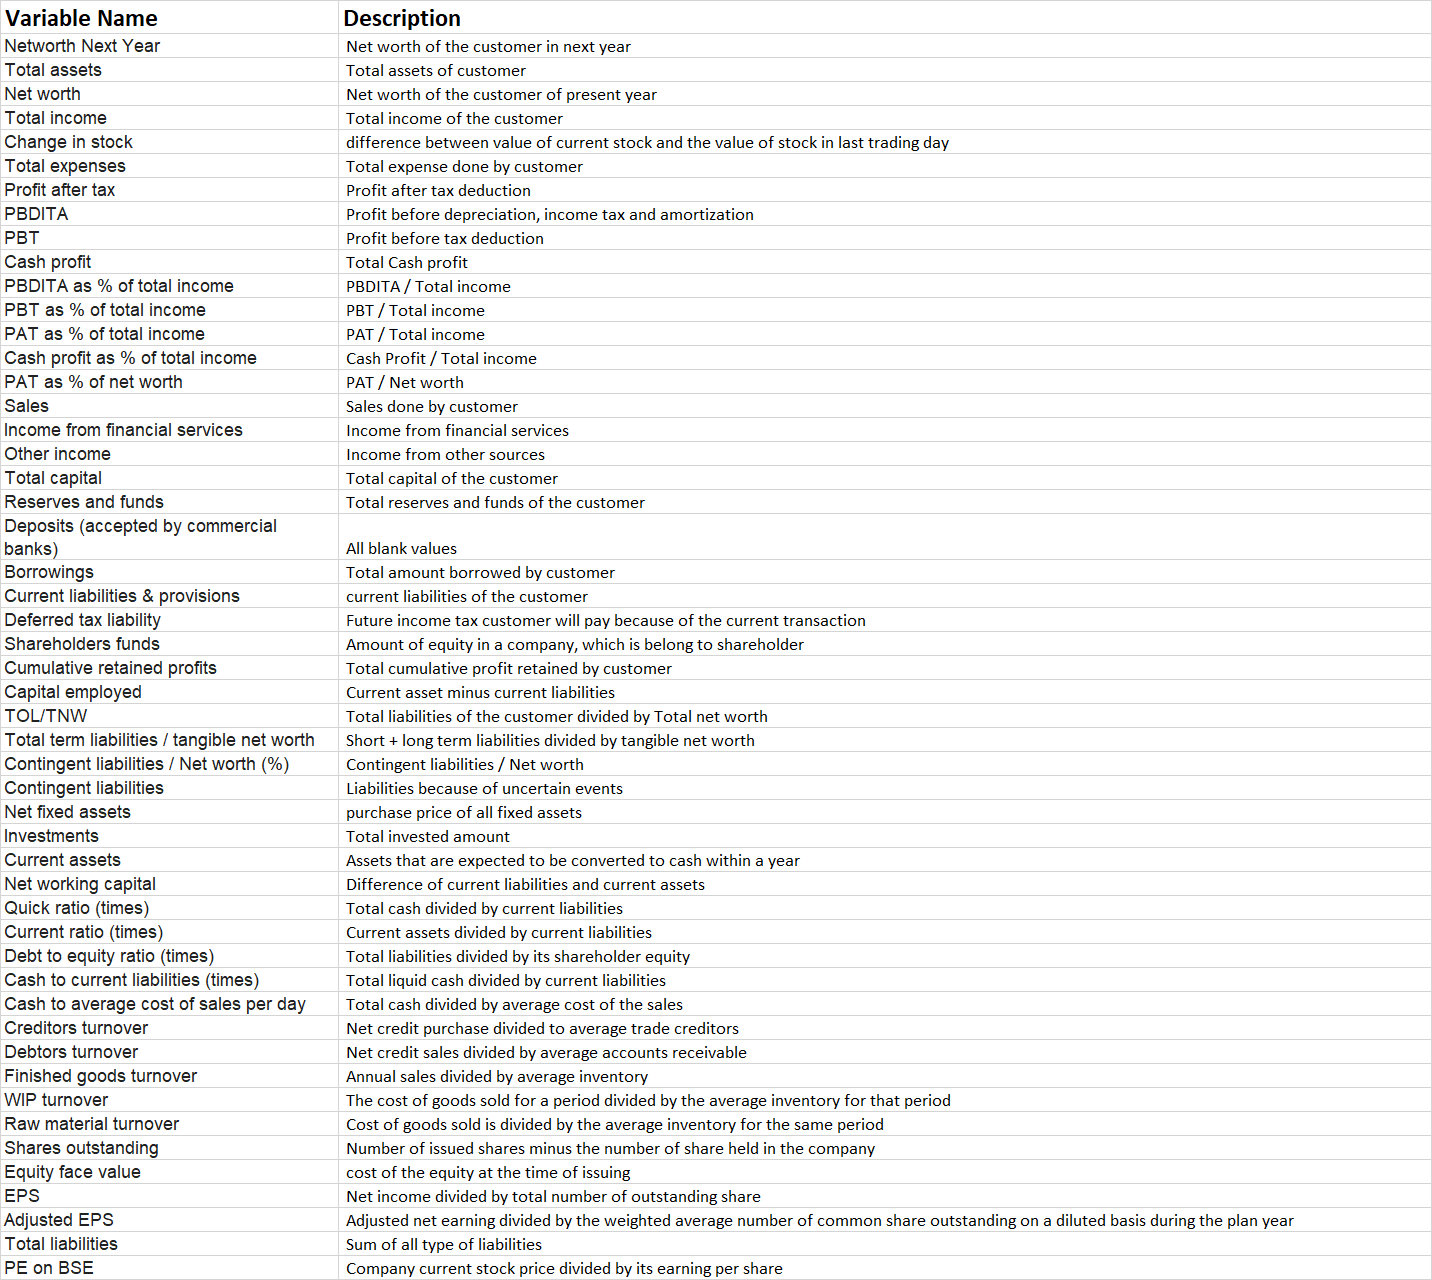

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Company(FRA) (1).csv")

In [3]:
df.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,...,5.65,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN
2,3,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,NaN
3,4,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,...,1.91,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,NaN
4,5,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,...,68.00,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,NaN


In [4]:
df.describe()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
count,4256.000000,4256.000000,4.256000e+03,4256.000000,4.025000e+03,3706.000000,4.091000e+03,4102.000000,4102.000000,4102.000000,...,3871.000000,3382.000000,3492.000000,3828.000000,3.446000e+03,3446.000000,4256.000000,4256.000000,4.256000e+03,1629.000000
mean,2128.500000,1344.740883,3.573617e+03,1351.949601,4.688190e+03,43.702482,4.356301e+03,295.050585,605.940639,410.259044,...,17.929029,84.369988,28.684513,17.733926,2.376491e+07,-1094.828671,-196.217467,-197.527608,3.573617e+03,55.462290
std,1228.745702,15936.743168,3.007444e+04,12961.311651,5.391895e+04,436.915048,5.139809e+04,3079.902071,5646.230633,4217.415307,...,90.164435,562.637359,169.650915,343.125864,1.709790e+08,34101.358644,13061.953425,13061.929512,3.007444e+04,1304.445296
min,1.000000,-74265.600000,1.000000e-01,0.000000,0.000000e+00,-3029.400000,-1.000000e-01,-3908.300000,-440.700000,-3894.800000,...,0.000000,-0.090000,-0.180000,-2.000000,-2.147484e+09,-999998.900000,-843181.820000,-843181.820000,1.000000e-01,-1116.640000
25%,1064.750000,3.975000,9.130000e+01,31.475000,1.071000e+02,-1.800000,9.680000e+01,0.500000,6.925000,0.800000,...,3.810000,8.190000,5.100000,3.020000,1.308382e+06,10.000000,0.000000,0.000000,9.130000e+01,2.970000
50%,2128.500000,72.100000,3.155000e+02,104.800000,4.551000e+02,1.600000,4.268000e+02,9.000000,36.900000,12.600000,...,6.470000,17.320000,9.860000,6.410000,4.750000e+06,10.000000,1.490000,1.240000,3.155000e+02,8.690000
75%,3192.250000,330.825000,1.120800e+03,389.850000,1.485000e+03,18.400000,1.395700e+03,53.300000,158.700000,74.175000,...,11.850000,40.012500,20.240000,11.822500,1.090602e+07,10.000000,10.000000,7.615000,1.120800e+03,17.000000
max,4256.000000,805773.400000,1.176509e+06,613151.600000,2.442828e+06,14185.500000,2.366035e+06,119439.100000,208576.500000,145292.600000,...,3135.200000,17947.600000,5651.400000,21092.000000,4.130401e+09,100000.000000,34522.530000,34522.530000,1.176509e+06,51002.740000


In [5]:
df.isna().sum()

Num                                               0
Networth Next Year                                0
Total assets                                      0
Net worth                                         0
Total income                                    231
Change in stock                                 550
Total expenses                                  165
Profit after tax                                154
PBDITA                                          154
PBT                                             154
Cash profit                                     154
PBDITA as % of total income                      79
PBT as % of total income                         79
PAT as % of total income                         79
Cash profit as % of total income                 79
PAT as % of net worth                             0
Sales                                           305
Income from fincial services                   1111
Other income                                   1556
Total capita

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Num                                          4256 non-null   int64  
 1   Networth Next Year                           4256 non-null   float64
 2   Total assets                                 4256 non-null   float64
 3   Net worth                                    4256 non-null   float64
 4   Total income                                 4025 non-null   float64
 5   Change in stock                              3706 non-null   float64
 6   Total expenses                               4091 non-null   float64
 7   Profit after tax                             4102 non-null   float64
 8   PBDITA                                       4102 non-null   float64
 9   PBT                                          4102 non-null   float64
 10  

In [7]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 4256 
The number of columns (variables) is 51


In [8]:
pd.options.display.float_format = '{:.2f}'.format 

In [9]:
df.describe()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
count,4256.00,4256.00,4256.00,4256.00,4025.00,3706.00,4091.00,4102.00,4102.00,4102.00,...,3871.00,3382.00,3492.00,3828.00,3446.00,3446.00,4256.00,4256.00,4256.00,1629.00
mean,2128.50,1344.74,3573.62,1351.95,4688.19,43.70,4356.30,295.05,605.94,410.26,...,17.93,84.37,28.68,17.73,23764909.56,-1094.83,-196.22,-197.53,3573.62,55.46
std,1228.75,15936.74,30074.44,12961.31,53918.95,436.92,51398.09,3079.90,5646.23,4217.42,...,90.16,562.64,169.65,343.13,170979041.33,34101.36,13061.95,13061.93,30074.44,1304.45
min,1.00,-74265.60,0.10,0.00,0.00,-3029.40,-0.10,-3908.30,-440.70,-3894.80,...,0.00,-0.09,-0.18,-2.00,-2147483647.00,-999998.90,-843181.82,-843181.82,0.10,-1116.64
25%,1064.75,3.98,91.30,31.48,107.10,-1.80,96.80,0.50,6.93,0.80,...,3.81,8.19,5.10,3.02,1308382.50,10.00,0.00,0.00,91.30,2.97
50%,2128.50,72.10,315.50,104.80,455.10,1.60,426.80,9.00,36.90,12.60,...,6.47,17.32,9.86,6.41,4750000.00,10.00,1.49,1.24,315.50,8.69
75%,3192.25,330.82,1120.80,389.85,1485.00,18.40,1395.70,53.30,158.70,74.17,...,11.85,40.01,20.24,11.82,10906020.00,10.00,10.00,7.62,1120.80,17.00
max,4256.00,805773.40,1176509.20,613151.60,2442828.20,14185.50,2366035.30,119439.10,208576.50,145292.60,...,3135.20,17947.60,5651.40,21092.00,4130400545.00,100000.00,34522.53,34522.53,1176509.20,51002.74


In [10]:
dfn = df.select_dtypes(include = ['float64','int64'])
numericcolumns = list(df.columns.values)
numericcolumns

['Num',
 'Networth Next Year',
 'Total assets',
 'Net worth',
 'Total income',
 'Change in stock',
 'Total expenses',
 'Profit after tax',
 'PBDITA',
 'PBT',
 'Cash profit',
 'PBDITA as % of total income',
 'PBT as % of total income',
 'PAT as % of total income',
 'Cash profit as % of total income',
 'PAT as % of net worth',
 'Sales',
 'Income from fincial services',
 'Other income',
 'Total capital',
 'Reserves and funds',
 'Borrowings',
 'Current liabilities & provisions',
 'Deferred tax liability',
 'Shareholders funds',
 'Cumulative retained profits',
 'Capital employed',
 'TOL/TNW',
 'Total term liabilities / tangible net worth',
 'Contingent liabilities / Net worth (%)',
 'Contingent liabilities',
 'Net fixed assets',
 'Investments',
 'Current assets',
 'Net working capital',
 'Quick ratio (times)',
 'Current ratio (times)',
 'Debt to equity ratio (times)',
 'Cash to current liabilities (times)',
 'Cash to average cost of sales per day',
 'Creditors turnover',
 'Debtors turnover'

<AxesSubplot:xlabel='Total assets', ylabel='Count'>

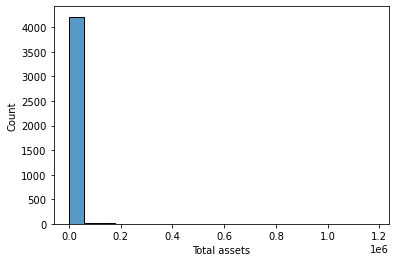

In [11]:
sns.histplot(df['Total assets'],bins=20)

<AxesSubplot:xlabel='Sales', ylabel='Count'>

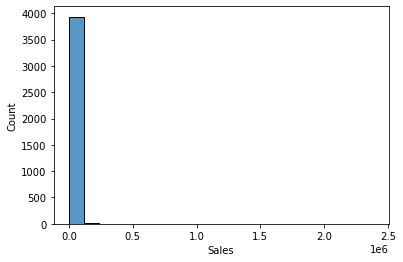

In [12]:
sns.histplot(df['Sales'],bins=20)

<AxesSubplot:xlabel='EPS', ylabel='Count'>

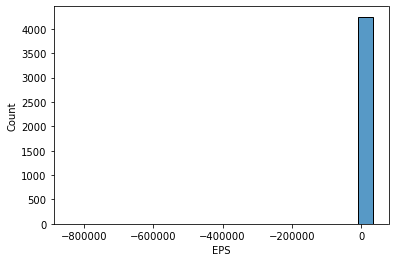

In [13]:
sns.histplot(df['EPS'],bins=20)

<AxesSubplot:xlabel='PE on BSE', ylabel='Count'>

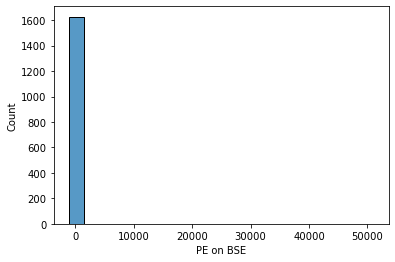

In [14]:
sns.histplot(df['PE on BSE'],bins=20)

<AxesSubplot:xlabel='Total liabilities', ylabel='Count'>

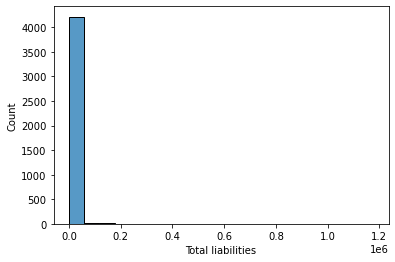

In [15]:
sns.histplot(df['Total liabilities'],bins=20)

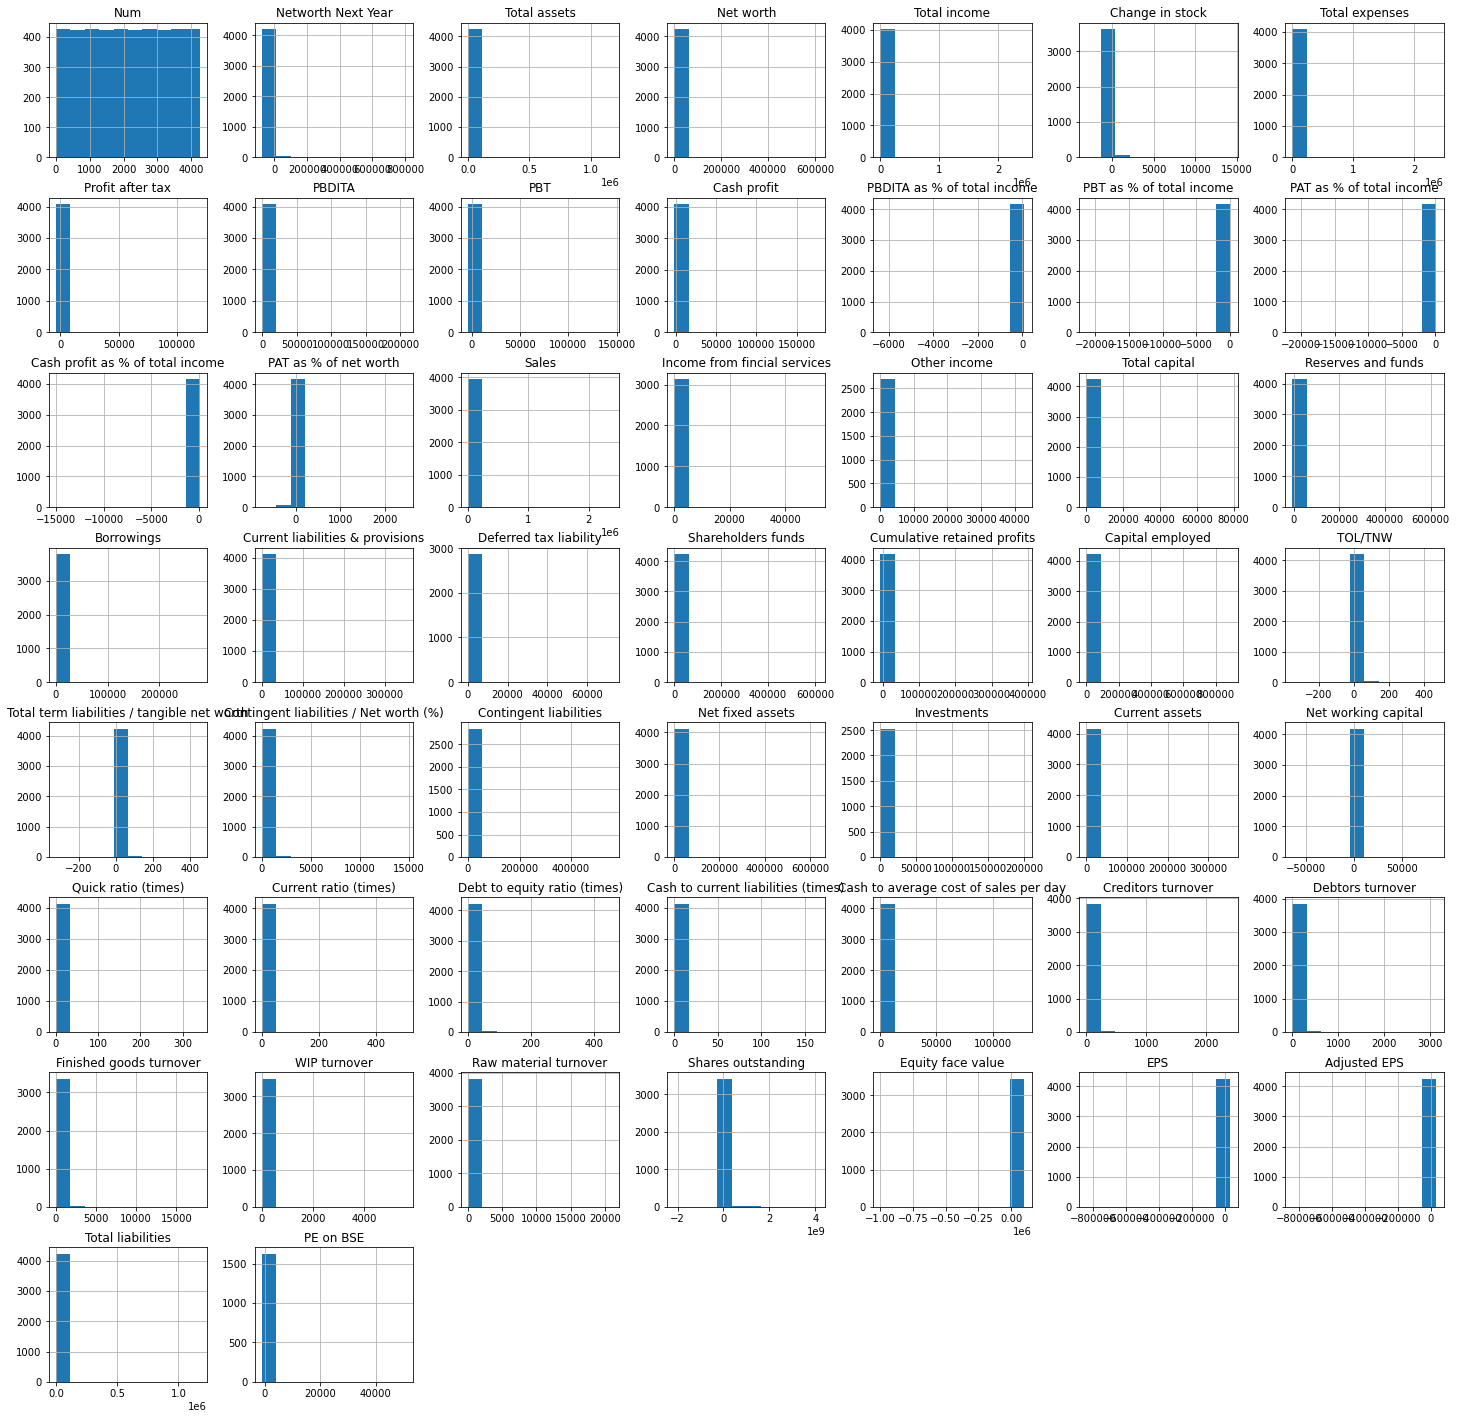

In [16]:
df.hist(figsize=(25,25))
plt.show()

In [17]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(4256, 51)


#### Creating a binary target variable using 'Networth_Next_Year' 

In [18]:
df['default'] = np.where((df['Networth Next Year'] > 0), 0, 1)

In [19]:
df[['default','Networth Next Year']].head(10)

,default,Networth Next Year
0,0,395.30
1,0,36.20
2,0,84.00
3,0,2041.40
4,0,41.80
5,0,291.50
6,0,93.30
7,0,985.10
8,0,188.60
9,0,229.60


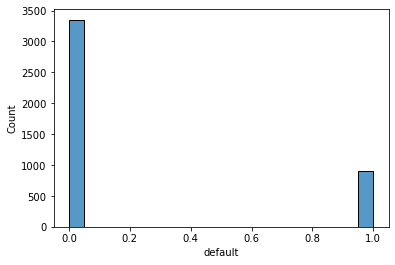

In [20]:
sns.histplot(df['default'],bins=20);

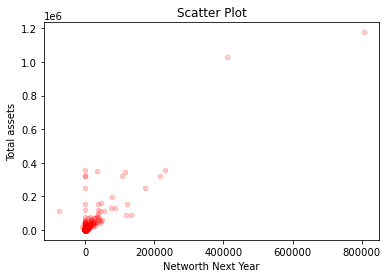

In [21]:
df.plot(kind='scatter', x='Networth Next Year', y='Total assets',alpha = 0.2,color = 'red')
plt.ylabel('Total assets')              # label = name of label
plt.xlabel('Networth Next Year')
plt.title('Scatter Plot')            # title = title of plot
plt.show()

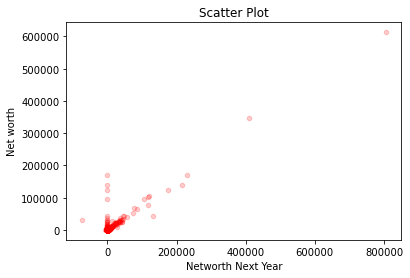

In [22]:
df.plot(kind='scatter', x='Networth Next Year', y='Net worth',alpha = 0.2,color = 'red')
plt.xlabel('Networth Next Year')              # label = name of label
plt.ylabel('Net worth')
plt.title('Scatter Plot')            # title = title of plot
plt.show()

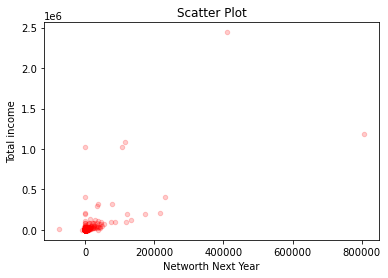

In [23]:
df.plot(kind='scatter', x='Networth Next Year', y='Total income',alpha = 0.2,color = 'red')
plt.xlabel('Networth Next Year')              # label = name of label
plt.ylabel('Total income')
plt.title('Scatter Plot')            # title = title of plot
plt.show()

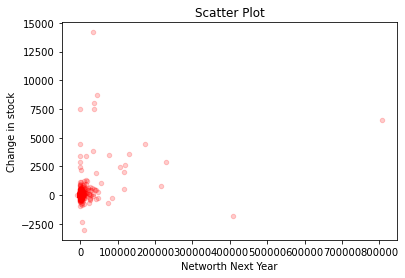

In [24]:
df.plot(kind='scatter', x='Networth Next Year', y='Change in stock',alpha = 0.2,color = 'red')
plt.xlabel('Networth Next Year')              # label = name of label
plt.ylabel('Change in stock')
plt.title('Scatter Plot')            # title = title of plot
plt.show()

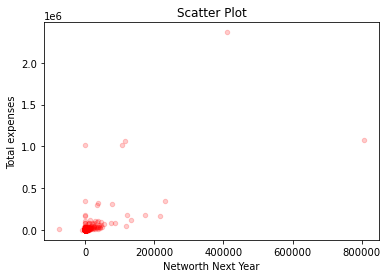

In [25]:
df.plot(kind='scatter', x='Networth Next Year', y='Total expenses',alpha = 0.2,color = 'red')
plt.xlabel('Networth Next Year')              # label = name of label
plt.ylabel('Total expenses')
plt.title('Scatter Plot')            # title = title of plot
plt.show()

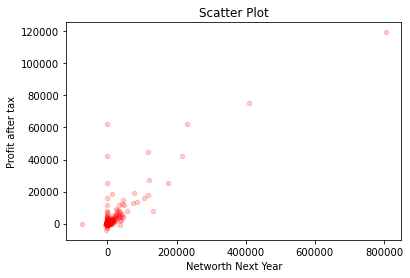

In [26]:
df.plot(kind='scatter', x='Networth Next Year', y='Profit after tax',alpha = 0.2,color = 'red')
plt.xlabel('Networth Next Year')              # label = name of label
plt.ylabel('Profit after tax')
plt.title('Scatter Plot')            # title = title of plot
plt.show()

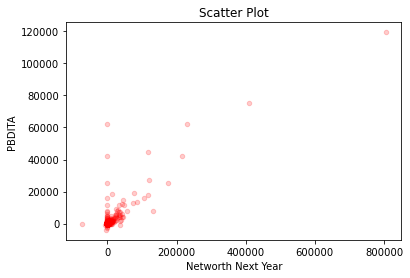

In [27]:
df.plot(kind='scatter', x='Networth Next Year', y='Profit after tax',alpha = 0.2,color = 'red')
plt.xlabel('Networth Next Year')              # label = name of label
plt.ylabel('PBDITA')
plt.title('Scatter Plot')            # title = title of plot
plt.show()

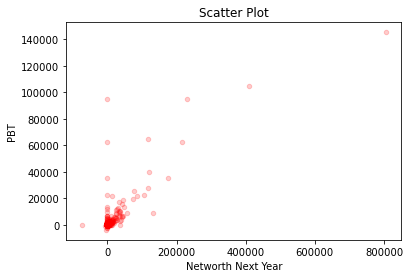

In [28]:
df.plot(kind='scatter', x='Networth Next Year', y='PBT',alpha = 0.2,color = 'red')
plt.xlabel('Networth Next Year')              # label = name of label
plt.ylabel('PBT')
plt.title('Scatter Plot')            # title = title of plot
plt.show()

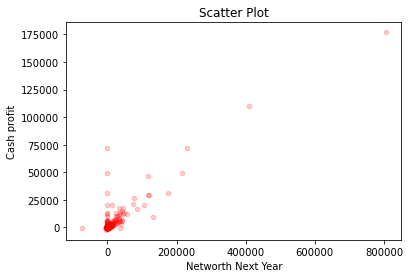

In [29]:
df.plot(kind='scatter', x='Networth Next Year', y='Cash profit',alpha = 0.2,color = 'red')
plt.xlabel('Networth Next Year')              # label = name of label
plt.ylabel('Cash profit')
plt.title('Scatter Plot')            # title = title of plot
plt.show()

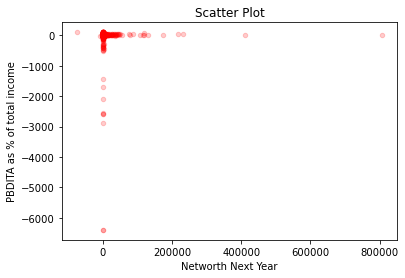

In [30]:
df.plot(kind='scatter', x='Networth Next Year', y='PBDITA as % of total income',alpha = 0.2,color = 'red')
plt.xlabel('Networth Next Year')              # label = name of label
plt.ylabel('PBDITA as % of total income')
plt.title('Scatter Plot')            # title = title of plot
plt.show()

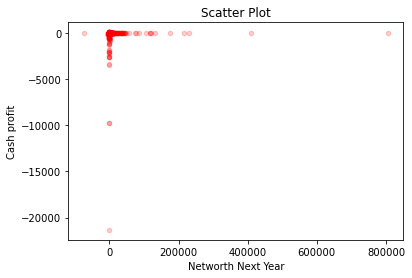

In [31]:
df.plot(kind='scatter', x='Networth Next Year', y='PBT as % of total income',alpha = 0.2,color = 'red')
plt.xlabel('Networth Next Year')              # label = name of label
plt.ylabel('Cash profit')
plt.title('Scatter Plot')            # title = title of plot
plt.show()

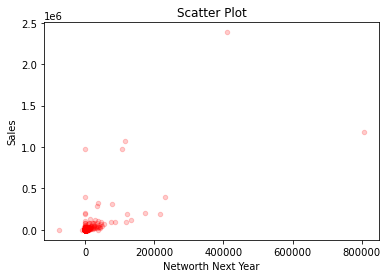

In [32]:

df.plot(kind='scatter', x='Networth Next Year', y='Sales',alpha = 0.2,color = 'red')
plt.xlabel('Networth Next Year')              # label = name of label
plt.ylabel('Sales')
plt.title('Scatter Plot')            # title = title of plot
plt.show()

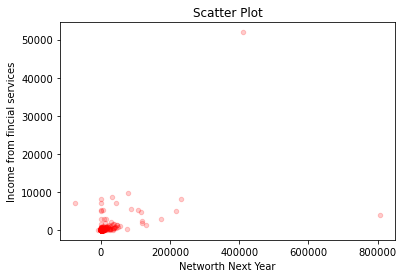

In [35]:
df.plot(kind='scatter', x='Networth Next Year', y='Income from fincial services',alpha = 0.2,color = 'red')
plt.xlabel('Networth Next Year')              # label = name of label
plt.ylabel('Income from fincial services')
plt.title('Scatter Plot')            # title = title of plot
plt.show()

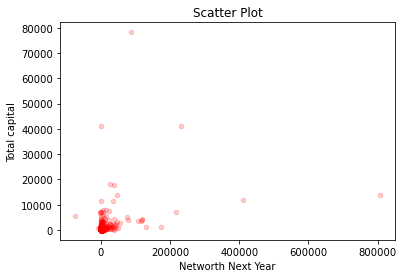

In [36]:
df.plot(kind='scatter', x='Networth Next Year', y='Total capital',alpha = 0.2,color = 'red')
plt.xlabel('Networth Next Year')              # label = name of label
plt.ylabel('Total capital')
plt.title('Scatter Plot')            # title = title of plot
plt.show()

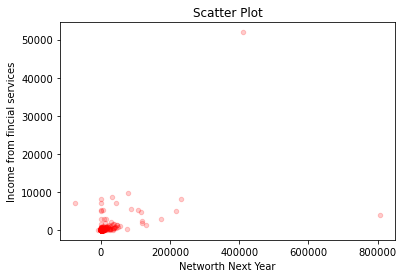

In [37]:
df.plot(kind='scatter', x='Networth Next Year', y='Income from fincial services',alpha = 0.2,color = 'Red')
plt.xlabel('Networth Next Year')              # label = name of label
plt.ylabel('Income from fincial services')
plt.title('Scatter Plot')            # title = title of plot
plt.show()

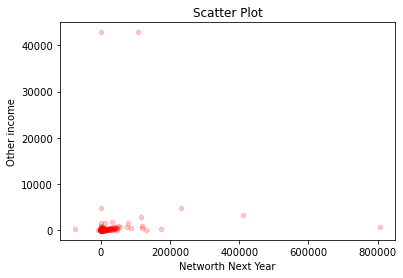

In [38]:
df.plot(kind='scatter', x='Networth Next Year', y='Other income',alpha = 0.2,color = 'red')
plt.xlabel('Networth Next Year')              # label = name of label
plt.ylabel('Other income')
plt.title('Scatter Plot')            # title = title of plot
plt.show()

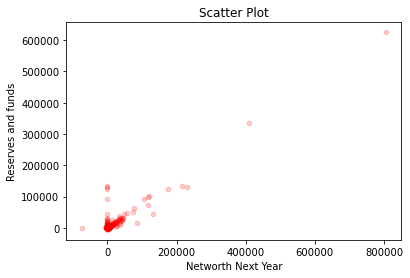

In [39]:
df.plot(kind='scatter', x='Networth Next Year', y='Reserves and funds',alpha = 0.2,color = 'red')
plt.xlabel('Networth Next Year')              # label = name of label
plt.ylabel('Reserves and funds')
plt.title('Scatter Plot')            # title = title of plot
plt.show()

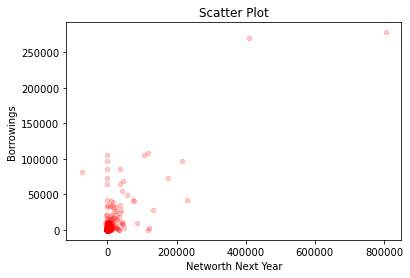

In [40]:
df.plot(kind='scatter', x='Networth Next Year', y='Borrowings',alpha = 0.2,color = 'red')
plt.xlabel('Networth Next Year')              # label = name of label
plt.ylabel('Borrowings')
plt.title('Scatter Plot')            # title = title of plot
plt.show()

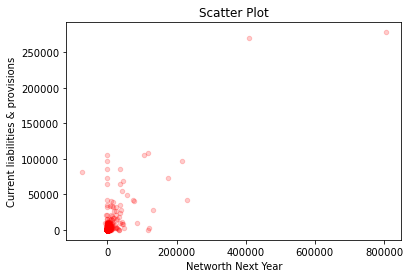

In [41]:
df.plot(kind='scatter', x='Networth Next Year', y='Borrowings',alpha = 0.2,color = 'red')
plt.xlabel('Networth Next Year')              # label = name of label
plt.ylabel('Current liabilities & provisions')
plt.title('Scatter Plot')            # title = title of plot
plt.show()

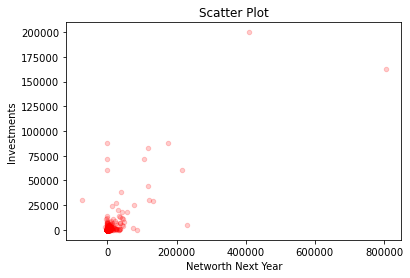

In [42]:
df.plot(kind='scatter', x='Networth Next Year', y='Investments',alpha = 0.2,color = 'red')
plt.xlabel('Networth Next Year')              # label = name of label
plt.ylabel('Investments')
plt.title('Scatter Plot')            # title = title of plot
plt.show()

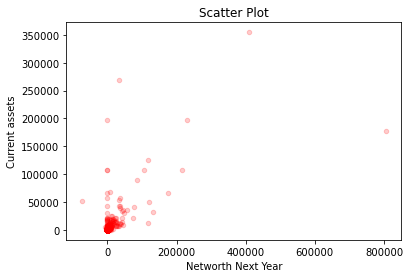

In [43]:
df.plot(kind='scatter', x='Networth Next Year', y='Current assets',alpha = 0.2,color = 'red')
plt.xlabel('Networth Next Year')              # label = name of label
plt.ylabel('Current assets')
plt.title('Scatter Plot')            # title = title of plot
plt.show()

##',
 '',
 'PAT as % of total income',
 'Cash profit as % of total income',
 'PAT as % of net worth',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Deferred tax liability',
 'Shareholders funds',
 'Cumulative retained profits',
 'Capital employed',
 'TOL/TNW',
 'Total term liabilities / tangible net worth',
 'Contingent liabilities / Net worth (%)',
 'Contingent liabilities',
 'Net fixed assets',
 '',
 '',
 'Net working capital',
 'Quick ratio (times)',
 'Current ratio (times)',
 'Debt to equity ratio (times)',
 'Cash to current liabilities (times)',
 'Cash to average cost of sales per day',
 'Creditors turnover',
 'Debtors turnover',
 'Finished goods turnover',
 'WIP turnover',
 'Raw material turnover',
 'Shares outstanding',
 'Equity face value',
 'EPS',
 'Adjusted EPS',
 'Total liabilities',
 'PE on BSE']##

In [45]:
df['default'].value_counts()

0    3352
1     904
Name: default, dtype: int64

In [46]:
df['default'].value_counts(normalize = True)

0   0.79
1   0.21
Name: default, dtype: float64

<AxesSubplot:>

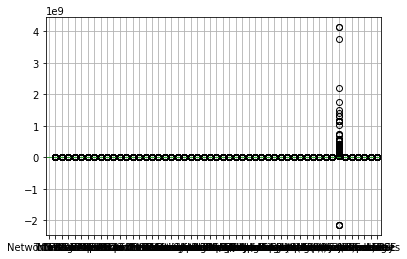

In [47]:
df.boxplot()

#### Let's check the number of outliers per column

In [48]:
Company_X = df.drop('default', axis = 1)
Company_Y = df['default']

In [49]:
Q1 = Company_X.quantile(0.25)
Q3 = Company_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [50]:
((Company_X > UL) | (Company_X < LL)).sum()

Num                                              0
Networth Next Year                             624
Total assets                                   585
Net worth                                      595
Total income                                   508
Change in stock                                750
Total expenses                                 518
Profit after tax                               712
PBDITA                                         584
PBT                                            704
Cash profit                                    627
PBDITA as % of total income                    346
PBT as % of total income                       546
PAT as % of total income                       610
Cash profit as % of total income               426
PAT as % of net worth                          427
Sales                                          500
Income from fincial services                   517
Other income                                   389
Total capital                  

In [51]:
((Company_X > UL) | (Company_X < LL)).sum().sum()

25946

In [52]:
Company_X[((Company_X > UL) | (Company_X < LL))]= np.nan

In [53]:
Company_X.isnull().sum()

Num                                               0
Networth Next Year                              624
Total assets                                    585
Net worth                                       595
Total income                                    739
Change in stock                                1300
Total expenses                                  683
Profit after tax                                866
PBDITA                                          738
PBT                                             858
Cash profit                                     781
PBDITA as % of total income                     425
PBT as % of total income                        625
PAT as % of total income                        689
Cash profit as % of total income                505
PAT as % of net worth                           427
Sales                                           805
Income from fincial services                   1628
Other income                                   1945
Total capita

In [54]:
Company_X.isnull().sum().sum()

43724

In [55]:
Company_Y.isnull().sum()

0

In [56]:
Company_X = Company_X.drop(['Num', 'Networth Next Year'], axis = 1)

In [57]:
Company_X.shape

(4256, 49)

In [58]:
Company_sub1 = pd.concat([Company_X, Company_Y], axis =1 )

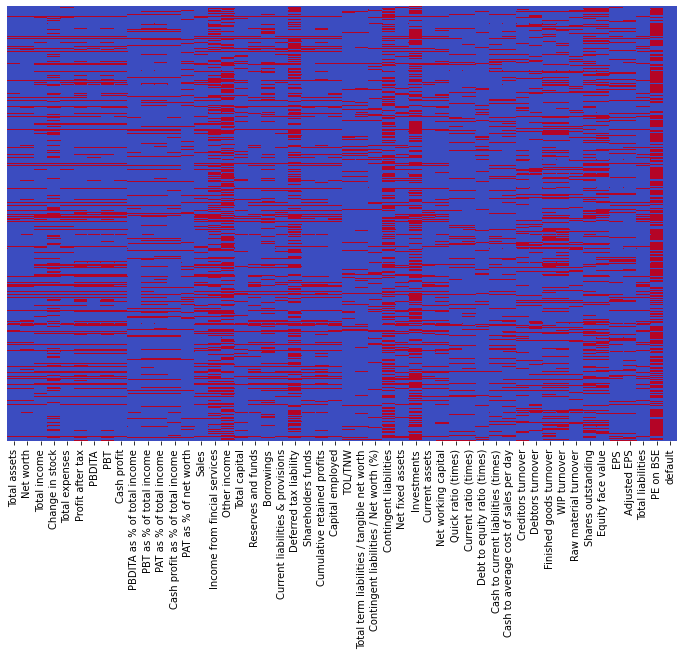

In [59]:
plt.figure(figsize = (12,8))
sns.heatmap(Company_sub1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [60]:
Company_sub1.isnull().sum(axis = 1)

0        4
1        9
2        4
3       21
4        5
        ..
4251    25
4252     5
4253     8
4254     6
4255     2
Length: 4256, dtype: int64

In [61]:
Company_sub1_temp = Company_sub1[Company_sub1.isnull().sum(axis = 1) <= 5]

In [62]:
Company_sub1_temp.shape

(1535, 50)

In [63]:
Company_sub1_temp['default'].value_counts()

0    1268
1     267
Name: default, dtype: int64

In [64]:
267/904

0.29535398230088494

In [65]:
Company_sub1['default'].value_counts()

0    3352
1     904
Name: default, dtype: int64

In [66]:
Company_sub1.isnull().sum().sort_values(ascending = False)/Company_sub1.index.size

PE on BSE                                     0.67
Investments                                   0.51
Other income                                  0.46
Contingent liabilities                        0.42
Deferred tax liability                        0.42
Income from fincial services                  0.38
Equity face value                             0.32
Change in stock                               0.31
Shares outstanding                            0.30
Finished goods turnover                       0.30
WIP turnover                                  0.27
Borrowings                                    0.23
Profit after tax                              0.20
PBT                                           0.20
Net working capital                           0.20
Creditors turnover                            0.20
Sales                                         0.19
Debtors turnover                              0.19
Cash profit                                   0.18
Cumulative retained profits    

#### Dropping columns with more than 30% missing values

In [67]:
Company_sub2 = Company_sub1.drop(['PE on BSE', 
                             'Investments', 'Other income', 'Contingent liabilities', 
                             'Deferred tax liability', 'Income from fincial services','Equity face value',
                                  'Shares outstanding','Change in stock'],axis = 1)

In [68]:
Company_sub2.shape

(4256, 41)

#### Segregate the predictors and response 

In [69]:
predictors = Company_sub2.drop('default', axis = 1)
response = Company_sub2['default']

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [71]:
Company_sub3 = pd.concat([scaled_predictors, response], axis = 1)

#### Imputing the remaining missing values

In [72]:
from sklearn.impute import KNNImputer

In [73]:
imputer = KNNImputer(n_neighbors=10)

In [74]:
Company_imputed = pd.DataFrame(imputer.fit_transform(Company_sub3), columns = Company_sub3.columns)

In [75]:
Company_imputed.isnull().sum()

Total assets                                   0
Net worth                                      0
Total income                                   0
Total expenses                                 0
Profit after tax                               0
PBDITA                                         0
PBT                                            0
Cash profit                                    0
PBDITA as % of total income                    0
PBT as % of total income                       0
PAT as % of total income                       0
Cash profit as % of total income               0
PAT as % of net worth                          0
Sales                                          0
Total capital                                  0
Reserves and funds                             0
Borrowings                                     0
Current liabilities & provisions               0
Shareholders funds                             0
Cumulative retained profits                    0
Capital employed    

#### Inspect possible correlations between independent variables 

<AxesSubplot:>

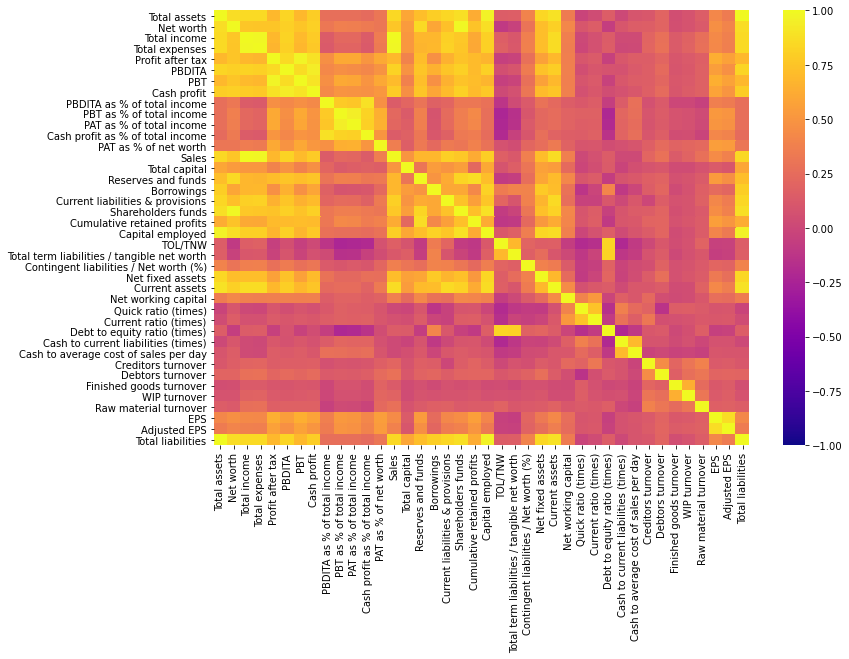

In [76]:
plt.figure(figsize = (12,8))
cor_matrix = Company_imputed.drop('default', axis = 1).corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

In [77]:
predictors = Company_imputed.drop('default', axis = 1)
response = Company_imputed['default']

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#### Splitting the data into train and test sets

In [79]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, 
                                                    test_size = 0.3, random_state = 2)

In [80]:
X_train.shape

(2979, 40)

In [81]:
X_test.shape

(1277, 40)

In [82]:
y_train.shape

(2979,)

#### For modeling we will use Logistic Regression with recursive feature elimination

In [159]:
LogR = LogisticRegression()

In [121]:
selector = RFE(estimator = LogR, n_features_to_select=10, step=1)

In [122]:
selector = selector.fit(X_train, y_train)

In [123]:
selector.n_features_

10

In [124]:
selector.ranking_

array([29,  5, 12,  1, 11,  1, 10,  1, 13, 25,  9,  1, 30,  3, 31,  1, 21,
       26,  1,  6, 16, 17, 22,  1,  8,  7, 27, 24,  1, 23, 14, 15, 18, 19,
        1,  4,  2, 20,  1, 28])

In [141]:
df = pd.DataFrame({'Feature': scaled_predictors.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 10]

,Feature,Rank
0,Total assets,10


#### Validating the model on train and test set 

In [142]:
from sklearn.metrics import confusion_matrix, classification_report

In [143]:
pred_train = selector.predict(X_train)
pred_test = selector.predict(X_test)

In [144]:
print(confusion_matrix(y_train, pred_train))

[[1264 1088]
 [ 262  365]]


In [145]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

         0.0       0.83      0.54      0.65      2352
         1.0       0.25      0.58      0.35       627

    accuracy                           0.55      2979
   macro avg       0.54      0.56      0.50      2979
weighted avg       0.71      0.55      0.59      2979



In [146]:
print(confusion_matrix(y_test, pred_test))

[[554 446]
 [127 150]]


In [147]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.81      0.55      0.66      1000
         1.0       0.25      0.54      0.34       277

    accuracy                           0.55      1277
   macro avg       0.53      0.55      0.50      1277
weighted avg       0.69      0.55      0.59      1277



We see poor recall score for both train and test

In [160]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=10)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [161]:
selector_smote = selector.fit(X_res, y_res)

In [162]:
selector_smote.n_features_

10

In [163]:
pred_train_smote = selector_smote.predict(X_res)
pred_test_smote = selector_smote.predict(X_test)

In [164]:
print(classification_report(y_res, pred_train_smote))

              precision    recall  f1-score   support

         0.0       0.59      0.54      0.56      2352
         1.0       0.57      0.62      0.60      2352

    accuracy                           0.58      4704
   macro avg       0.58      0.58      0.58      4704
weighted avg       0.58      0.58      0.58      4704



In [165]:
print(classification_report(y_test, pred_test_smote))

              precision    recall  f1-score   support

         0.0       0.82      0.56      0.66      1000
         1.0       0.25      0.54      0.35       277

    accuracy                           0.56      1277
   macro avg       0.53      0.55      0.50      1277
weighted avg       0.69      0.56      0.59      1277



In [166]:
from sklearn.ensemble import RandomForestClassifier

In [167]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clfRF=RandomForestClassifier(n_estimators=100, max_leaf_nodes = 5)

In [168]:
clfRF.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=5)

In [169]:
pred_train = clfRF.predict(X_train)
pred_test = clfRF.predict(X_test)

RFmodel_score_train = clfRF.score(X_train, y_train)
RFmodel_score_test = clfRF.score(X_test, y_test)

In [170]:
print(metrics.classification_report(y_train,pred_train,digits=3))
print(metrics.classification_report(y_test,pred_test,digits=3))

              precision    recall  f1-score   support

         0.0      0.795     1.000     0.885      2352
         1.0      0.952     0.032     0.062       627

    accuracy                          0.796      2979
   macro avg      0.874     0.516     0.474      2979
weighted avg      0.828     0.796     0.712      2979

              precision    recall  f1-score   support

         0.0      0.783     0.998     0.878      1000
         1.0      0.333     0.004     0.007       277

    accuracy                          0.782      1277
   macro avg      0.558     0.501     0.442      1277
weighted avg      0.686     0.782     0.689      1277



<b>Train Data:</b>  
           
    Accuracy: 100%          
    Precision: 79.5%        
    f1-Score: 88.5%     
            
<b>Test Data:</b>      
         
    Accuracy: 99%        
    Precision: 78%       
    f1-Score: 87%     
  